# Problema 2.6
### Determinación del tamaño de reactores de flujo tapón en serie

"Elementos de Ingeniería de las reacciones químicas" ,Scott Fogler capitulo 2, página 59

![newnotebook](../imágenes/problema2.6.png)

Primero importaremos la librerías que nos ayudaran a resolver el problema (No olvides activar las librerías con **Shift+enter**):
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps


In [2]:
X = np.array([0.0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8])
Fao_rA = np.array([0.89, 1.08, 1.33, 2.05, 3.54, 5.06, 8.0])

In [3]:
# Cálculo para el área bajo la curva
# Uso de la regla de Simpson
area = simps(y=Fao_rA, x=X, dx=0.00001)

In [4]:
# Delimitación área sombreada
y0 = np.zeros(len(Fao_rA))

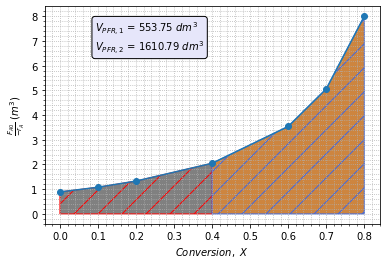

In [7]:
# Plot
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.minorticks_on()
ax1.set_xlabel('$Conversion, \\ X$')
ax1.set_ylabel('$\\frac{F_{A0}}{-r_A} \\ \\left( m^3 \\right)$')
ax1.plot(X, Fao_rA, marker='o')
ax1.fill_between(X[:4], y0[:4], Fao_rA[:4], where=Fao_rA[:4] > y0[:4],
                 facecolor='gray', edgecolor='red', alpha=1, hatch='/')
ax1.fill_between(X[3:], y0[3:], Fao_rA[3:], where=Fao_rA[3:] > y0[3:],
                 facecolor='peru', edgecolor='royalblue', alpha=1, hatch='/')
ax1.grid(which='BOTH', ls=':')
ax1.grid(True)

# Volume calculations
V_PFR1 = round(simps(x=X[:4], y=Fao_rA[:4], dx=0.00001) * 1000.0, 2)
V_PFR2 = round(simps(x=X[3:], y=Fao_rA[3:], dx=0.00001) * 1000.0, 2)
textstr = '$V_{PFR, 1}$ = ' + str(V_PFR1) + '$\\ dm^3$\n' +\
          '$V_{PFR, 2}$ = ' + str(V_PFR2) + '$\\ dm^3$'
position = (0.15, 0.94)
props = dict(boxstyle='round', facecolor='lavender', alpha=1)
ax1.text(position[0], position[1], textstr,
         transform=ax1.transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.show()